In [ ]:
# imports

import pandas as pd
import holidays
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# https://www.kaggle.com/datasets/anshtanwar/metro-interstate-traffic-volume
df_traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df_traffic.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [ ]:
df_traffic.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,3259.818355,281.205870,0.334264,0.000222,49.362231
std,1986.860670,13.338232,44.789133,0.008168,39.015750
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1193.000000,272.160000,0.000000,0.000000,1.000000
50%,3380.000000,282.450000,0.000000,0.000000,64.000000
75%,4933.000000,291.806000,0.000000,0.000000,90.000000
max,7280.000000,310.070000,9831.300000,0.510000,100.000000


In [ ]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              61 non-null     object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   date_time            48204 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


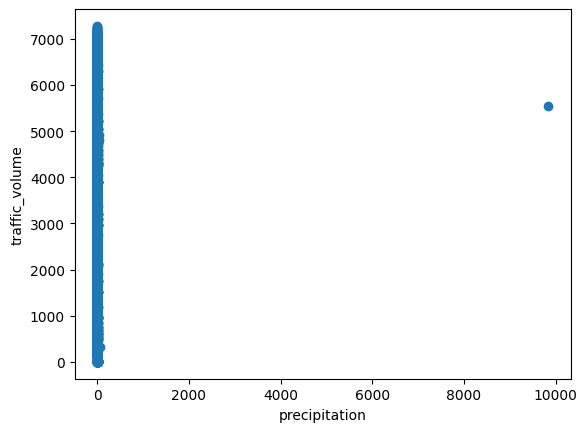

In [ ]:
# scatter plot com chuva
plt.scatter(df_traffic['rain_1h'], df_traffic['traffic_volume'])
plt.xlabel('precipitation')
plt.ylabel('traffic_volume')
plt.show()

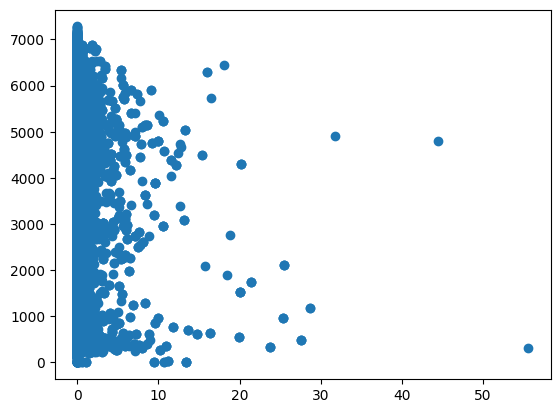

In [ ]:
df_traffic = df_traffic[df_traffic['rain_1h'] < 9000]
plt.scatter(df_traffic['rain_1h'], df_traffic['traffic_volume'])

In [ ]:
# Coluna holiday possui muitos registros nulos/vazios, portanto será removida
df_traffic.drop('holiday', axis=1, inplace=True)
df_traffic.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [ ]:
# Extraindo hora de date_time
df_traffic['date_time'] = pd.to_datetime(df_traffic['date_time'], format='%d-%m-%Y %H:%M')
df_traffic['hour'] = df_traffic['date_time'].dt.hour
df_traffic.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,hour
0,5545,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,9
1,4516,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,10
2,4767,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,11
3,5026,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,12
4,4918,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,13


In [ ]:
print(df_traffic["weather_main"].value_counts())
print("_________")
print(df_traffic["weather_description"].value_counts())

weather_main
Clouds          15164
Clear           13391
Mist             5950
Rain             5671
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64
_________
weather_description
sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow    

In [ ]:
df_traffic = pd.get_dummies(df_traffic, columns=['weather_main'])
df_traffic

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_description,date_time,hour,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm
0,5545,288.28,0.0,0.0,40,scattered clouds,2012-10-02 09:00:00,9,False,True,False,False,False,False,False,False,False,False,False
1,4516,289.36,0.0,0.0,75,broken clouds,2012-10-02 10:00:00,10,False,True,False,False,False,False,False,False,False,False,False
2,4767,289.58,0.0,0.0,90,overcast clouds,2012-10-02 11:00:00,11,False,True,False,False,False,False,False,False,False,False,False
3,5026,290.13,0.0,0.0,90,overcast clouds,2012-10-02 12:00:00,12,False,True,False,False,False,False,False,False,False,False,False
4,4918,291.14,0.0,0.0,75,broken clouds,2012-10-02 13:00:00,13,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,3543,283.45,0.0,0.0,75,broken clouds,2018-09-30 19:00:00,19,False,True,False,False,False,False,False,False,False,False,False
48200,2781,282.76,0.0,0.0,90,overcast clouds,2018-09-30 20:00:00,20,False,True,False,False,False,False,False,False,False,False,False
48201,2159,282.73,0.0,0.0,90,proximity thunderstorm,2018-09-30 21:00:00,21,False,False,False,False,False,False,False,False,False,False,True
48202,1450,282.09,0.0,0.0,90,overcast clouds,2018-09-30 22:00:00,22,False,True,False,False,False,False,False,False,False,False,False


In [ ]:
holidays_eua = holidays.UnitedStates()

def is_business_day(date):
  if date.weekday() >= 5:
    return False
  if date in holidays_eua:
    return False
  return True

df_traffic['is_business_day'] = df_traffic['date_time'].apply(is_business_day)
df_traffic

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_description,date_time,hour,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,is_business_day
0,5545,288.28,0.0,0.0,40,scattered clouds,2012-10-02 09:00:00,9,False,True,False,False,False,False,False,False,False,False,False,True
1,4516,289.36,0.0,0.0,75,broken clouds,2012-10-02 10:00:00,10,False,True,False,False,False,False,False,False,False,False,False,True
2,4767,289.58,0.0,0.0,90,overcast clouds,2012-10-02 11:00:00,11,False,True,False,False,False,False,False,False,False,False,False,True
3,5026,290.13,0.0,0.0,90,overcast clouds,2012-10-02 12:00:00,12,False,True,False,False,False,False,False,False,False,False,False,True
4,4918,291.14,0.0,0.0,75,broken clouds,2012-10-02 13:00:00,13,False,True,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,3543,283.45,0.0,0.0,75,broken clouds,2018-09-30 19:00:00,19,False,True,False,False,False,False,False,False,False,False,False,False
48200,2781,282.76,0.0,0.0,90,overcast clouds,2018-09-30 20:00:00,20,False,True,False,False,False,False,False,False,False,False,False,False
48201,2159,282.73,0.0,0.0,90,proximity thunderstorm,2018-09-30 21:00:00,21,False,False,False,False,False,False,False,False,False,False,True,False
48202,1450,282.09,0.0,0.0,90,overcast clouds,2018-09-30 22:00:00,22,False,True,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Removendo as colunas weather_description e date_time
df_traffic.drop(['weather_description', 'date_time'], axis=1, inplace=True)
df_traffic

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,hour,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,is_business_day
0,5545,288.28,0.0,0.0,40,9,False,True,False,False,False,False,False,False,False,False,False,True
1,4516,289.36,0.0,0.0,75,10,False,True,False,False,False,False,False,False,False,False,False,True
2,4767,289.58,0.0,0.0,90,11,False,True,False,False,False,False,False,False,False,False,False,True
3,5026,290.13,0.0,0.0,90,12,False,True,False,False,False,False,False,False,False,False,False,True
4,4918,291.14,0.0,0.0,75,13,False,True,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,3543,283.45,0.0,0.0,75,19,False,True,False,False,False,False,False,False,False,False,False,False
48200,2781,282.76,0.0,0.0,90,20,False,True,False,False,False,False,False,False,False,False,False,False
48201,2159,282.73,0.0,0.0,90,21,False,False,False,False,False,False,False,False,False,False,True,False
48202,1450,282.09,0.0,0.0,90,22,False,True,False,False,False,False,False,False,False,False,False,False


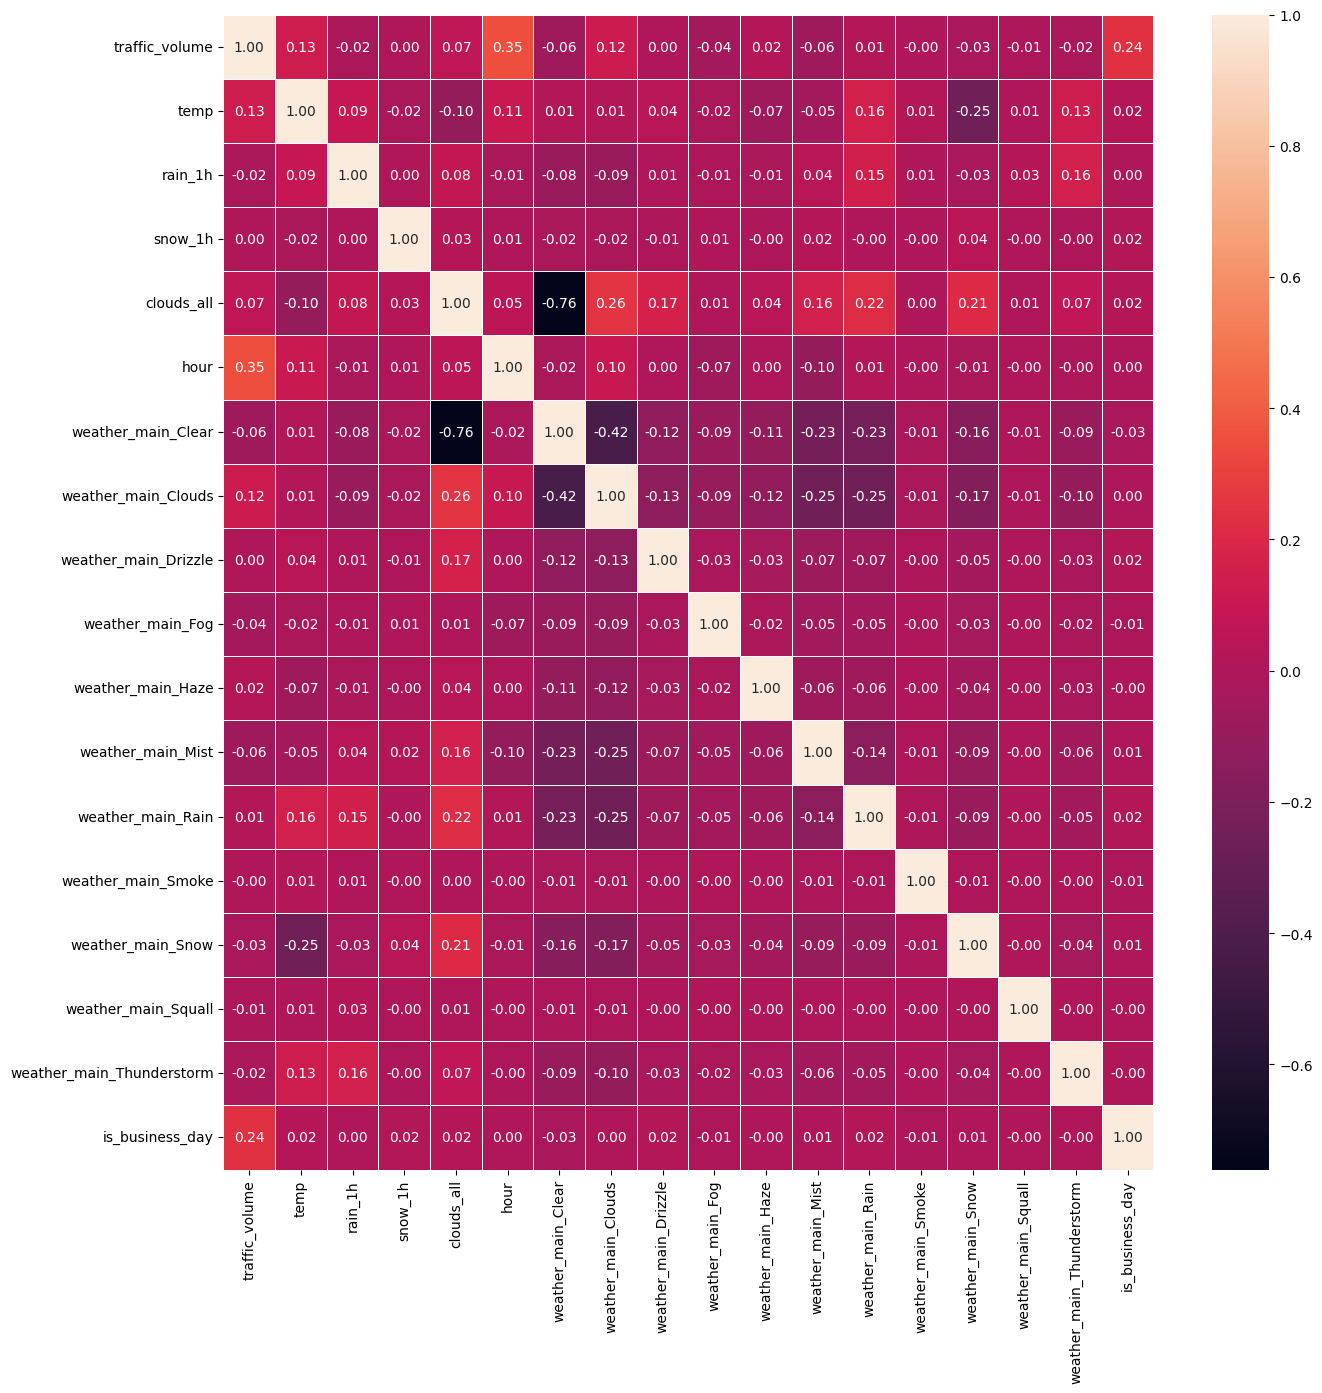

In [ ]:
corr_matrix = df_traffic.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f",linewidth=.5)
plt.show()

In [ ]:
# usar as features que possuem correlação maior que 0.10
reg_lin = LinearRegression()
X = df_traffic[["temp", "hour", "weather_main_Clouds", "is_business_day"]]
y = df_traffic["traffic_volume"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg_lin.fit(X_train, y_train)
y_pred = reg_lin.predict(X_test)
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 1565.128636782303
